In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit an AutoRegression Model

In [328]:
# GET ts data
ar1_data = pd.read_excel('ts_data.xlsx') 
ar1_data

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282
...,...,...
9995,9996,1.302256
9996,9997,0.558165
9997,9998,-1.401546
9998,9999,-1.817701


In [329]:
ar1_data = ar1_data['Value']  # get the 'Value' column

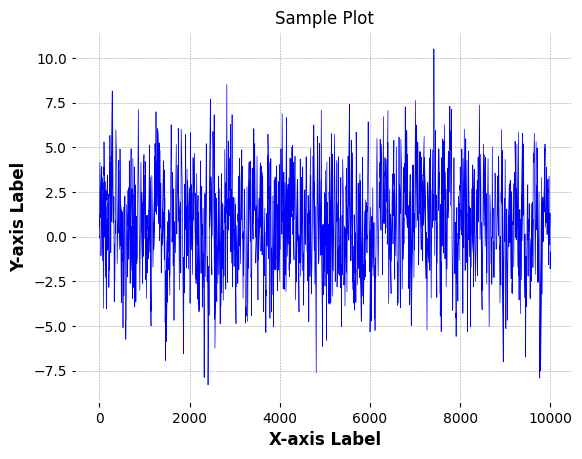

In [330]:
plt.plot(ar1_data, color='blue', linestyle='-', linewidth=0.5)  # Plot the data with style
plt.title('Sample Plot')  # Add a title
plt.xlabel('X-axis Label')  # Label for the x-axis
plt.ylabel('Y-axis Label')  # Label for the y-axis
plt.grid(True)  # Enable grid
plt.show()

In [331]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [332]:
adf = adfuller(ar1_data)            # test for stationarity of the time series
print('ADF Statistic: %f' % adf[0]) # print the test statistic
print('p-value: %f' % adf[1])       # print the p-value

ADF Statistic: -22.184930
p-value: 0.000000


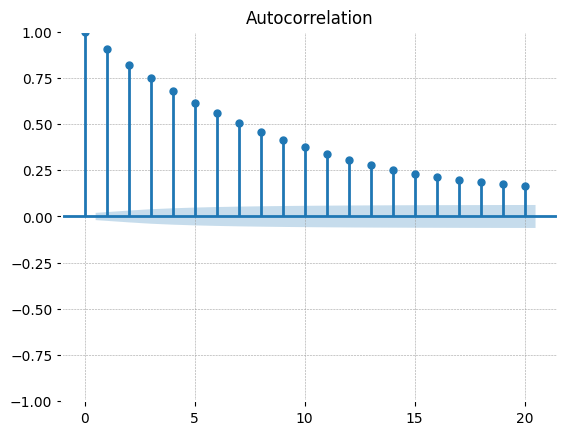

In [333]:
plot_acf(ar1_data, lags=20)
plt.show()

In [334]:
# Fit AR(1) model
ar1_model = sm.tsa.ARIMA(ar1_data, order=(1, 0, 0))   # AR(1) model, no differencing, no MA terms
ar1_results = ar1_model.fit()                         # Fit the model

In [335]:
ar1_results.summary()                                 # Print the model summary  
                                                      # The sigma2 is the variance of the residuals

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14131.929
Date:                Wed, 15 May 2024   AIC                          28269.858
Time:                        10:05:51   BIC                          28291.489
Sample:                             0   HQIC                         28277.180
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7026      0.106      6.634      0.000       0.495       0.910
ar.L1          0.9061      0.004    214.370      0.000       0.898       0.914
sigma2         0.9883      0.014     70.730      0.000       0.961       1.016
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.51   Prob(JB):                         0.85
Heteroskedasticity (H):               0.95   Skew:                            -0.01
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [336]:
# Fit AR(2) model
ar2_model = sm.tsa.ARIMA(ar1_data, order=(2, 0, 0))
ar2_results = ar2_model.fit()

In [337]:
ar2_results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -14131.659
Date:                Wed, 15 May 2024   AIC                          28271.318
Time:                        10:05:52   BIC                          28300.159
Sample:                             0   HQIC                         28281.081
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7018      0.107      6.582      0.000       0.493       0.911
ar.L1          0.8993      0.010     89.650      0.000       0.880       0.919
ar.L2          0.0074      0.010      0.739      0.460      -0.012       0.027
sigma2         0.9884      0.014     70.705      0.000       0.961       1.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.99   Prob(JB):                         0.85
Heteroskedasticity (H):               0.95   Skew:                            -0.01
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# AR(1) Model Exploration and Random Walk

In [287]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ar1(beta_0, beta_1, sigma, n):        # Function to generate AR(1) time series
    ts = np.zeros(n)
    for i in range(1, n):
        ts[i] = beta_0 + beta_1 * ts[i-1] + np.random.normal(0, sigma)
    return ts

## Random Walk

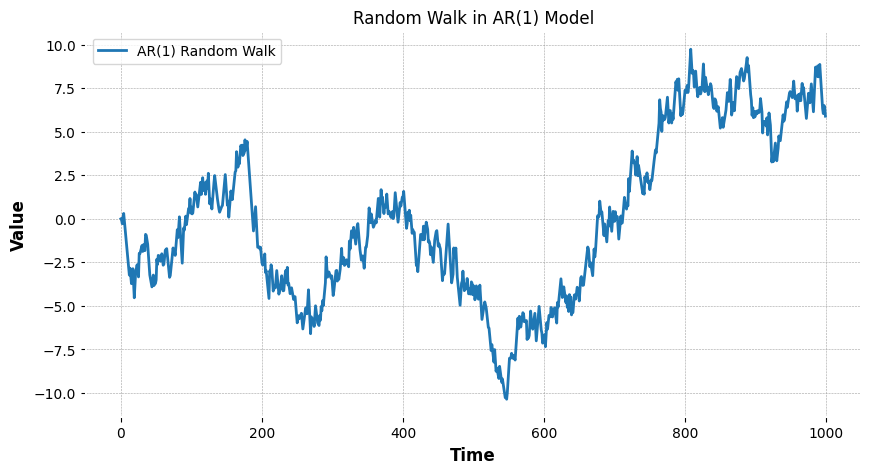

In [297]:
# Parameters for AR(1) model
beta_0 = 0       # beta_0 = 0 indicates no drift.  Try different values to see the effect
beta_1 = 1
sigma = 0.5
n = 1000

time_series = generate_ar1(beta_0, beta_1, sigma, n)   # Generate AR(1) time series

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(time_series, label='AR(1) Random Walk')
plt.title('Random Walk in AR(1) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

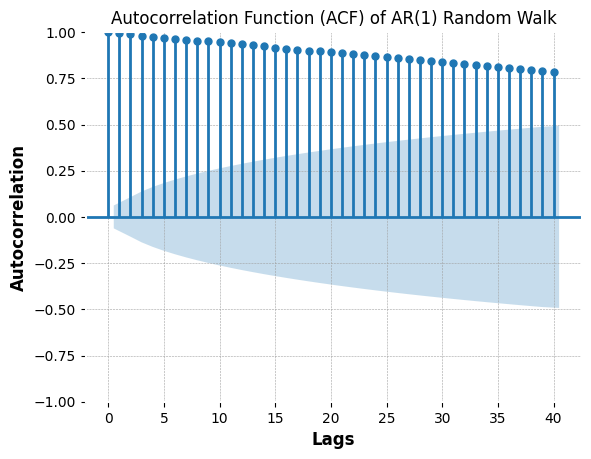

In [298]:
# Plotting the ACF
plt.figure(figsize=(12, 6))
plot_acf(time_series, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of AR(1) Random Walk')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

## $|\beta_1| < 1$

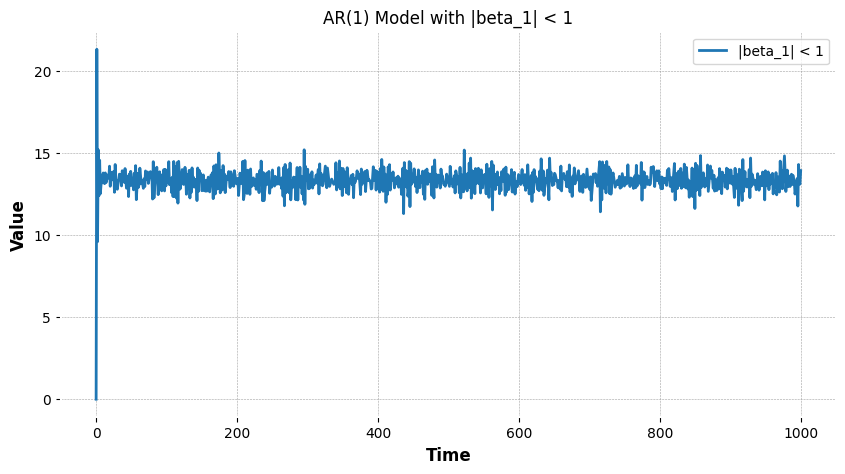

In [305]:
# Parameters for AR(1) model
beta_0 = 0    
beta_1 = 0.5    # Try different values of beta_0 and beta_1 to see the effect
sigma = 0.5
n = 1000

time_series = generate_ar1(beta_0, beta_1, sigma, n)   # Generate AR(1) time series

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(time_series, label='|beta_1| < 1')
plt.title('AR(1) Model with |beta_1| < 1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

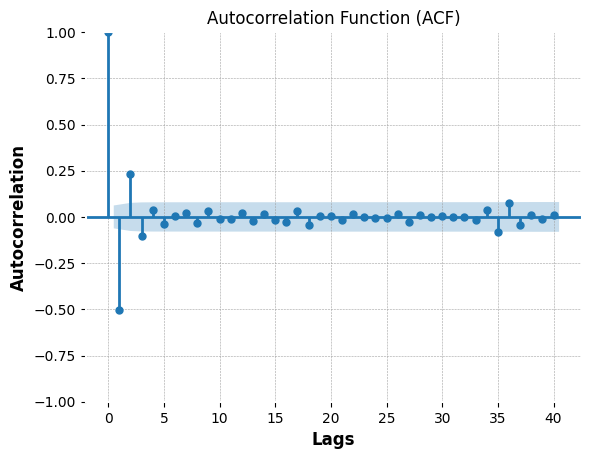

In [306]:
# Plotting the ACF
plt.figure(figsize=(12, 6))
plot_acf(time_series, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

## $|\beta_1| >1$ 

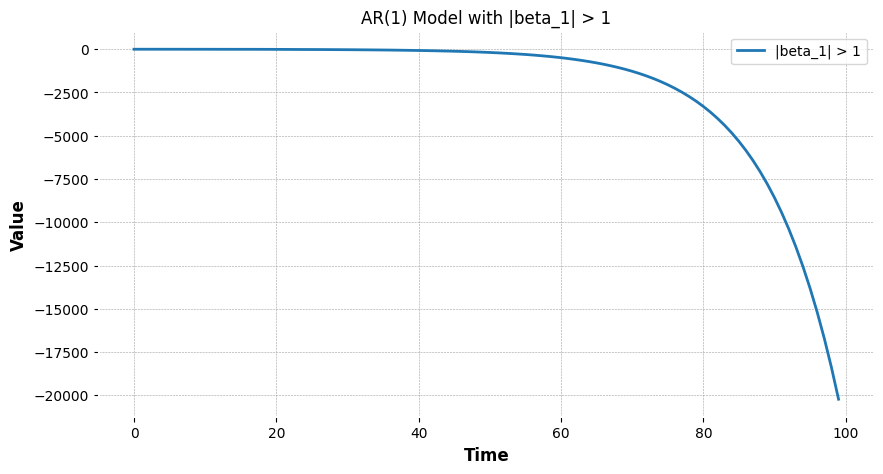

In [312]:
# Parameters for AR(1) model
beta_0 = 0       
beta_1 = 1.1    # Try different values of beta_0 and beta_1 to see the effect. Try negative beta_1
sigma = 0.5
n = 100

time_series = generate_ar1(beta_0, beta_1, sigma, n)   # Generate AR(1) time series

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(time_series, label='|beta_1| > 1')
plt.title('AR(1) Model with |beta_1| > 1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

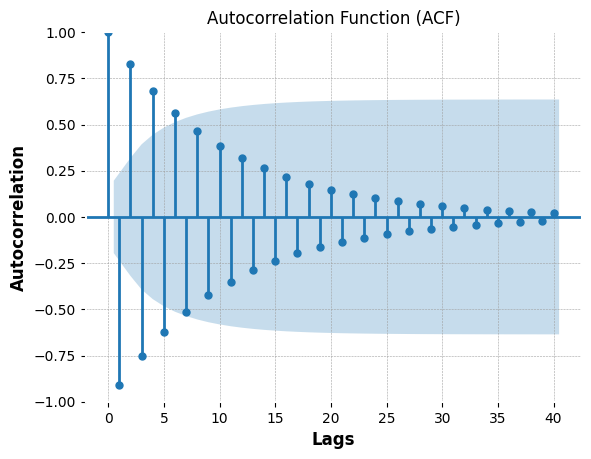

In [311]:
# Plotting the ACF
plt.figure(figsize=(12, 6))
plot_acf(time_series, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Analysis of Stock Price

In [ ]:
# import yfinance as yf    # yfinance is a popular library to fetch financial data, but it has been limited in China

# We manually download the data from Yahoo Finance and save it as a CSV file

In [313]:
import pandas as pd
import statsmodels.api as sm

# Read data from CSV
tickerDf = pd.read_csv('GOOG.csv')

# Convert 'Date' column to datetime format
tickerDf['Date'] = pd.to_datetime(tickerDf['Date'])

# Prepare data for regression
# Calculate the number of days since the start of the dataset
tickerDf['Time'] = (tickerDf['Date'] - tickerDf['Date'].min()).dt.days

## Linear Regression

In [314]:
# Add a constant to the independent variables
X = sm.add_constant(tickerDf['Time'])

# Dependent variable
y = tickerDf['Close']

# Fit regression model
model = sm.OLS(y, X).fit()

# Predictions
predictions = model.predict(X)

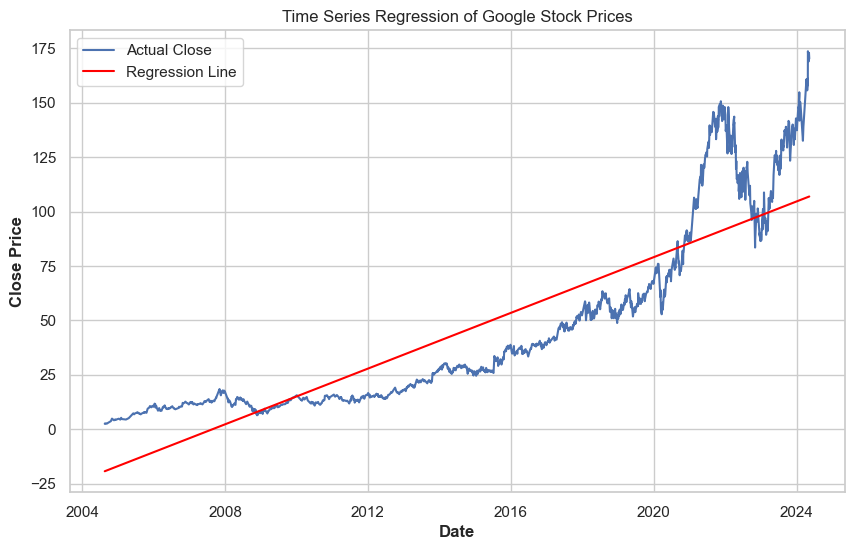

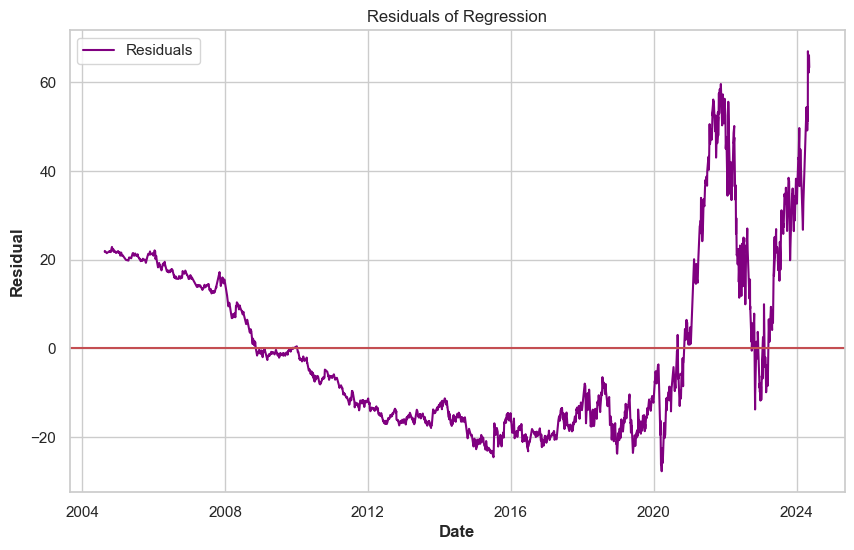

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(tickerDf['Date'], tickerDf['Close'], label='Actual Close')
plt.plot(tickerDf['Date'], predictions, color='red', label='Regression Line')
plt.title('Time Series Regression of Google Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plotting residuals
residuals = y - predictions
plt.figure(figsize=(10, 6))
plt.plot(tickerDf['Date'], residuals, label='Residuals', color='purple')
plt.title('Residuals of Regression')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()


## AR(1) Model

In [316]:
# Read data from CSV
tickerDf = pd.read_csv('GOOG.csv')

# Convert 'Date' column to datetime format
tickerDf['Date'] = pd.to_datetime(tickerDf['Date'])


# Set the Date column as the index of the DataFrame
tickerDf.set_index('Date', inplace=True)

# Select the 'Close' column for the AR(1) model
y = tickerDf['Close']

# Fit AR(1) model
# Note: order=(1,0,0) specifies an AR(1) model
model = sm.tsa.ARIMA(y, order=(1, 0, 0))
fitted_model = model.fit()

# Make predictions
# We'll predict the last 10 days to see how our model performs
predictions = fitted_model.predict(start=1, end=len(y)-1)

/Users/yalotein/Softwares/Anaconda/x86_64/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yalotein/Softwares/Anaconda/x86_64/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yalotein/Softwares/Anaconda/x86_64/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yalotein/Softwares/Anaconda/x86_64/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWar

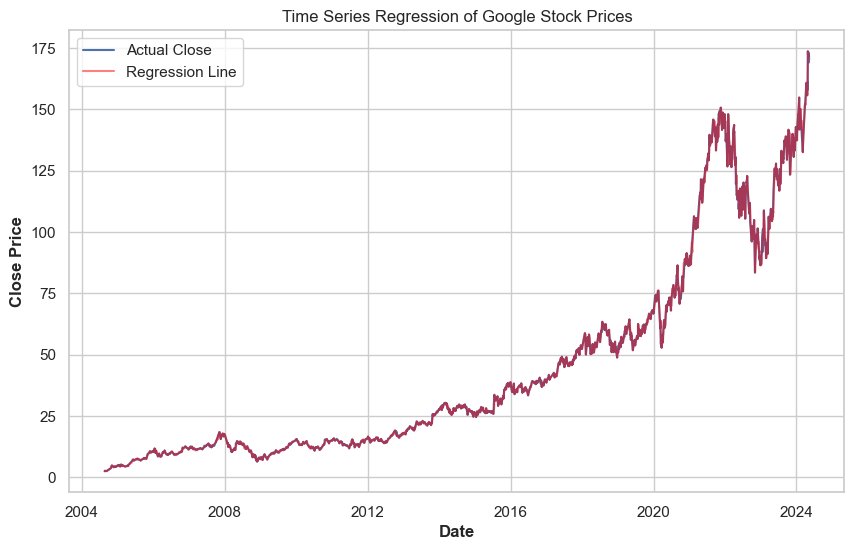

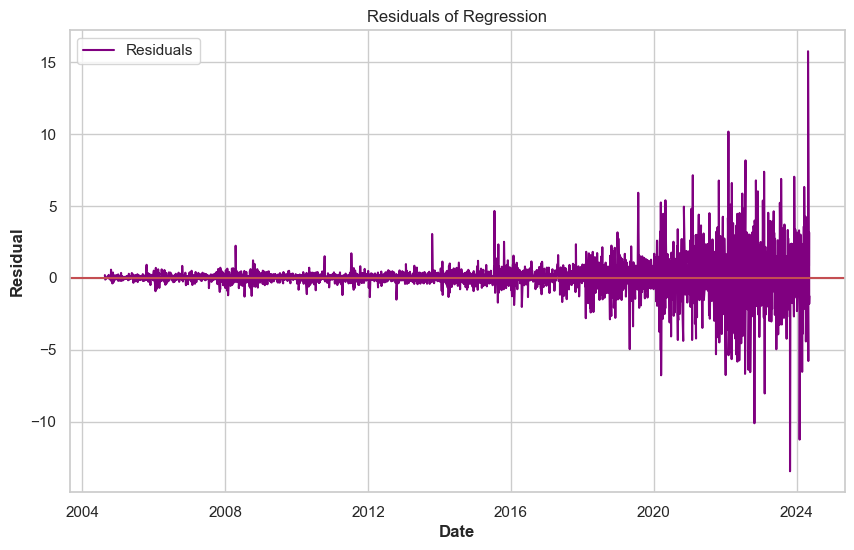

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(tickerDf['Close'], label='Actual Close')
plt.plot(predictions, color='red', label='Regression Line', alpha=0.5)
plt.title('Time Series Regression of Google Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plotting residuals
residuals = y - predictions
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.title('Residuals of Regression')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()


# Some plots of financial data

/Users/yalotein/Softwares/Anaconda/x86_64/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


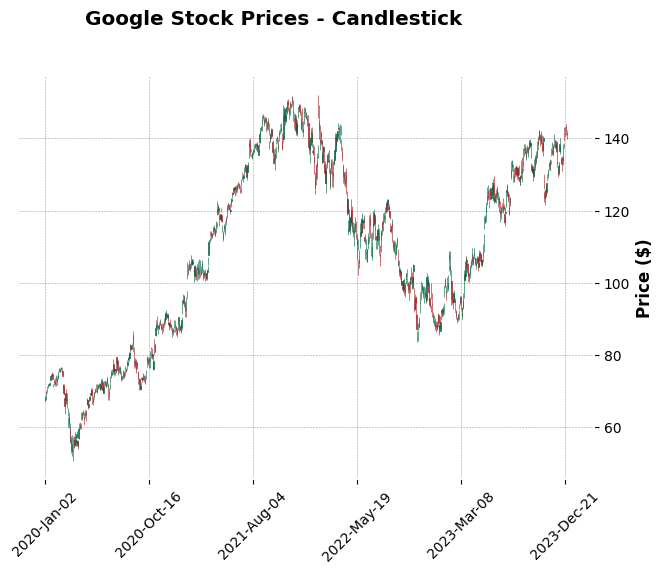

In [318]:
import mplfinance as mpf

# Read data from CSV
tickerDf = pd.read_csv('GOOG.csv')

# Convert 'Date' column to datetime format
tickerDf['Date'] = pd.to_datetime(tickerDf['Date'])

# Set the index to be the date
tickerDf.set_index('Date', inplace=True)

start_date = '2020-01-01'
end_date = '2023-12-31'

# Filter the data
tickerDf = tickerDf[start_date:end_date]

# Create a candlestick chart
mpf.plot(tickerDf[['Open', 'High', 'Low', 'Close']], type='candle', style='charles',
         title='Google Stock Prices - Candlestick', ylabel='Price ($)')


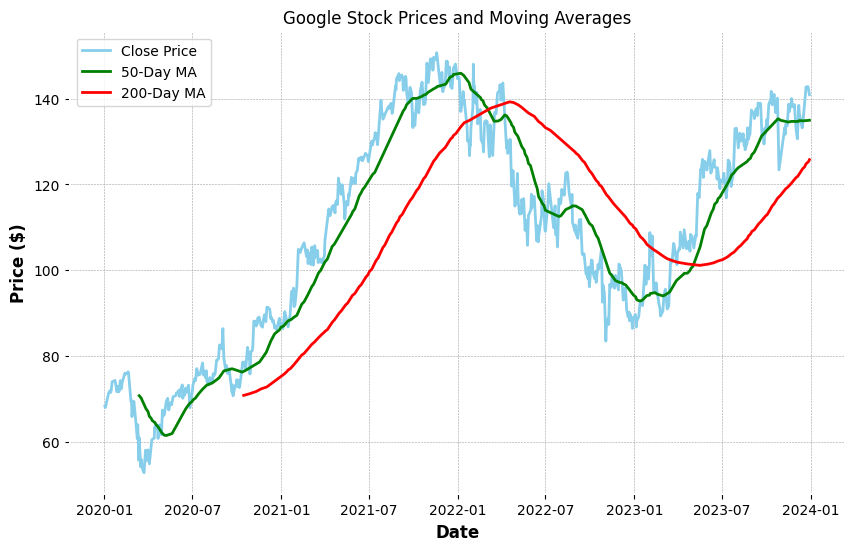

In [319]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate moving averages
tickerDf['MA50'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['MA200'] = tickerDf['Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tickerDf.index, tickerDf['Close'], label='Close Price', color='skyblue')
plt.plot(tickerDf.index, tickerDf['MA50'], label='50-Day MA', color='green')
plt.plot(tickerDf.index, tickerDf['MA200'], label='200-Day MA', color='red')
plt.title('Google Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


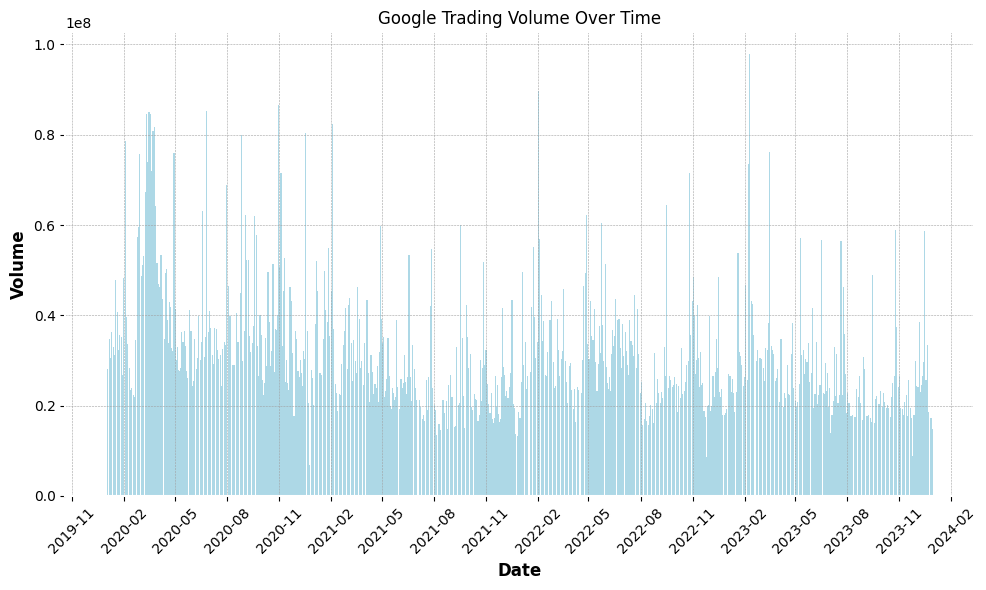

In [320]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Example DataFrame load and preparation if needed
# tickerDf = pd.read_csv('GOOG.csv')
# tickerDf['Date'] = pd.to_datetime(tickerDf['Date'])
# tickerDf.set_index('Date', inplace=True)

# Plotting volume using plt.plot for better date handling
plt.figure(figsize=(10, 6))
plt.bar(tickerDf.index, tickerDf['Volume'], width=2, color='lightblue')  # width can be adjusted for aesthetic preference
plt.title('Google Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Set x-axis major locator to month or quarter
# For monthly ticks
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# For quarterly ticks, uncomment the following line
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Set x-axis major formatter
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Improve layout
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

plt.show()


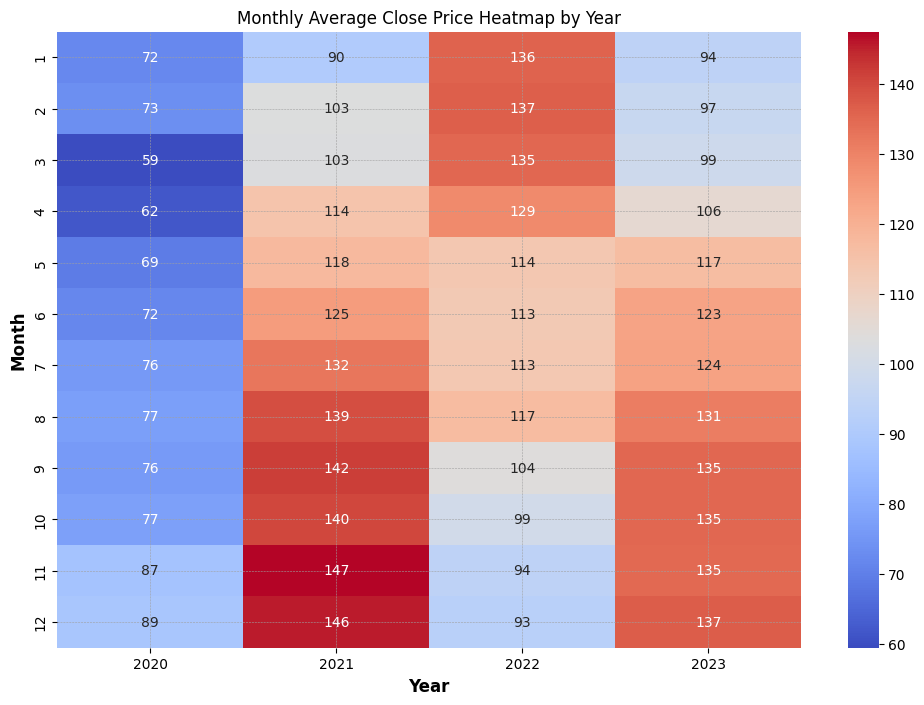

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume tickerDf is already loaded and Date is in datetime format
tickerDf['Year'] = tickerDf.index.year
tickerDf['Month'] = tickerDf.index.month

# Create a pivot table with years on one axis and months on the other
pivot = tickerDf.pivot_table(values='Close', index='Month', columns='Year', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Monthly Average Close Price Heatmap by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


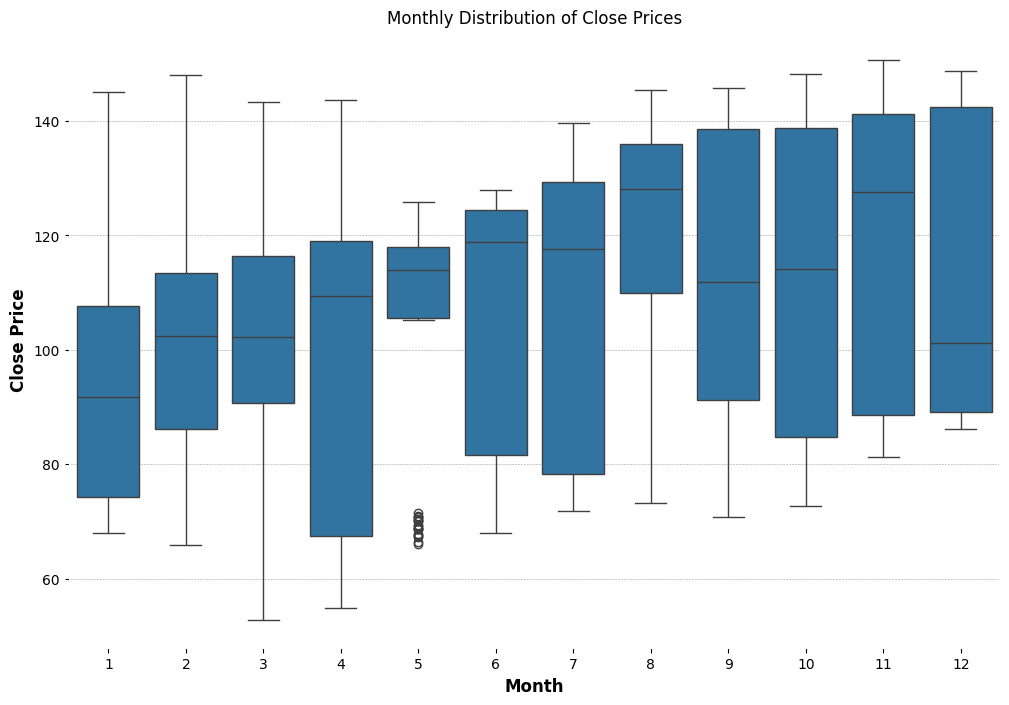

In [322]:
# Box plot of monthly price distributions
plt.figure(figsize=(12, 8))
sns.boxplot(x=tickerDf.index.month, y=tickerDf['Close'])
plt.title('Monthly Distribution of Close Prices')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()


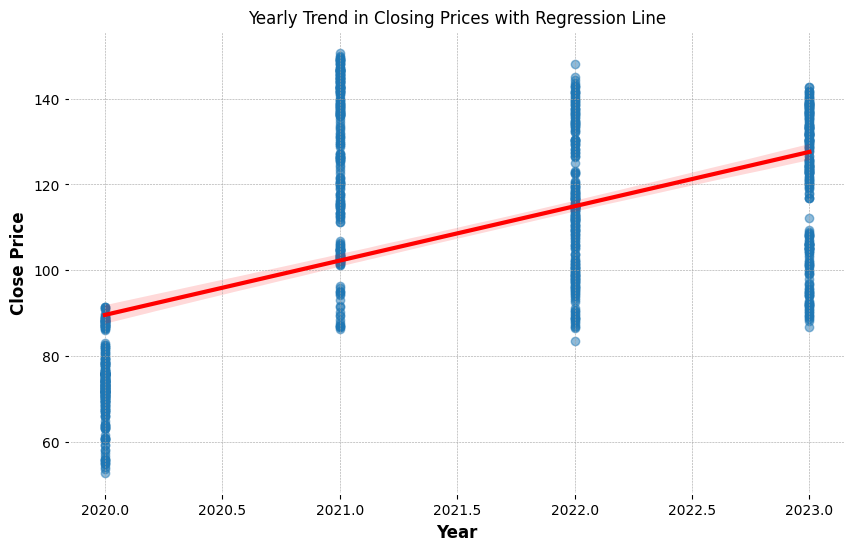

In [323]:
plt.figure(figsize=(10, 6))
sns.regplot(x=tickerDf.index.year, y=tickerDf['Close'].values, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Yearly Trend in Closing Prices with Regression Line')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()


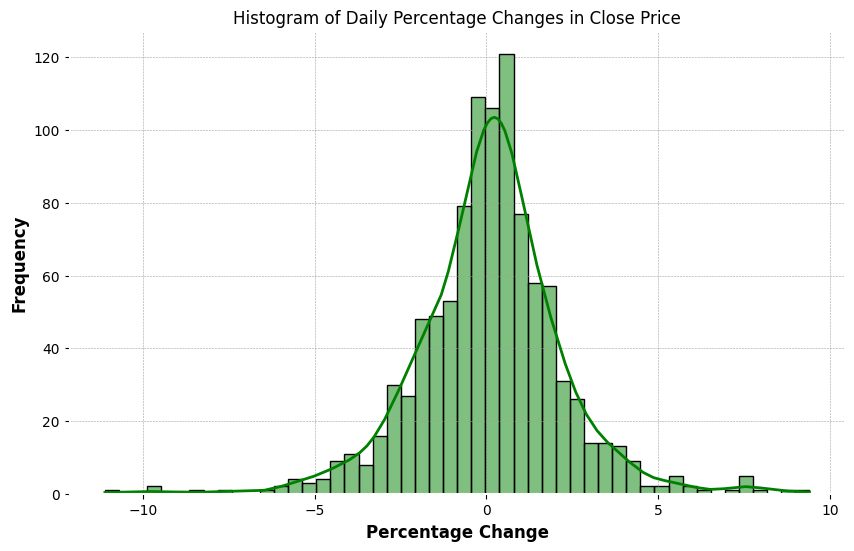

In [324]:
# Calculate daily percentage change
tickerDf['Pct Change'] = tickerDf['Close'].pct_change() * 100

# Histogram of daily percentage changes
plt.figure(figsize=(10, 6))
sns.histplot(tickerDf['Pct Change'].dropna(), bins=50, kde=True, color='green')
plt.title('Histogram of Daily Percentage Changes in Close Price')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.show()


# AR(1) with linear trends, seasonality, and other effects

In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [49]:
# Load dataset
data = sm.datasets.get_rdataset("AirPassengers").data

In [113]:
df = pd.DataFrame(data)  # Convert to DataFrame

start_date = '1949-01'   # Change this based on actual data start date
dates = pd.date_range(start=start_date, periods=len(df), freq='M')   # Generate date range, freq = 'M' means monthly
df.index = dates         # Set the index to the date range

df['log_passengers'] = np.log(df['value'])   # Log transform the data

t = np.arange(1, len(df) + 1)   # Generate time values to represent time trend
df['time'] = t                  # Add time trend to the DataFrame
df['sin_2pi_t_12'] = np.sin(2 * np.pi * t / 12)   # Add seasonal component: sin
df['cos_2pi_t_12'] = np.cos(2 * np.pi * t / 12)   # Add seasonal component: cos

df['log_passengers_lag1'] = df['log_passengers'].shift(1)  # Lag 1 of log transformed data as a feature

print(df.head())

            time  value  sin_2pi_t_12  cos_2pi_t_12  log_passengers  \
1949-01-31     1    112      0.500000  8.660254e-01        4.718499   
1949-02-28     2    118      0.866025  5.000000e-01        4.770685   
1949-03-31     3    132      1.000000  6.123234e-17        4.882802   
1949-04-30     4    129      0.866025 -5.000000e-01        4.859812   
1949-05-31     5    121      0.500000 -8.660254e-01        4.795791   

            log_passengers_lag1  
1949-01-31                  NaN  
1949-02-28             4.718499  
1949-03-31             4.770685  
1949-04-30             4.882802  
1949-05-31             4.859812  


/var/folders/db/q3nfx51s6z9399vl2z77c0wh0000gn/T/ipykernel_43790/2633637662.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=start_date, periods=len(df), freq='M')   # Generate date range, freq = 'M' means monthly


In [114]:
# Drop the first row since it contains NaN due to the lag
df = df.dropna()

# Define the regression formula
formula = 'log_passengers ~ log_passengers_lag1 + time + sin_2pi_t_12 + cos_2pi_t_12'

# Fit the model
model = sm.OLS.from_formula(formula, data=df).fit()

# Print out the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_passengers   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1047.
Date:                Mon, 20 May 2024   Prob (F-statistic):          4.01e-102
Time:                        20:58:57   Log-Likelihood:                 162.10
No. Observations:                 143   AIC:                            -314.2
Df Residuals:                     138   BIC:                            -299.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.5324    

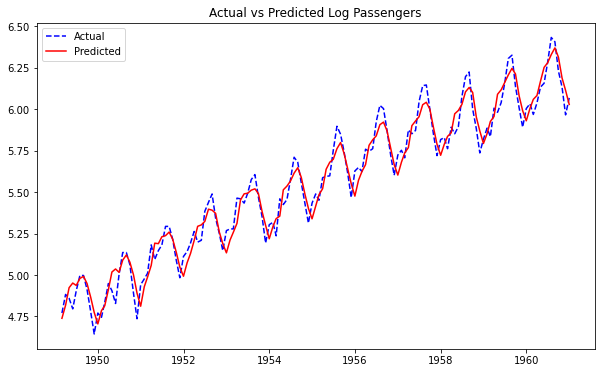

In [115]:
predictions = model.predict(df)  # Make predictions

# Plot actual vs predicted log passengers
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['log_passengers'], label='Actual', color='blue', linestyle='--')
plt.plot(df.index, predictions, label='Predicted', color = 'red')
plt.title('Actual vs Predicted Log Passengers')
plt.legend()
plt.show()

<Figure size 864x432 with 0 Axes>

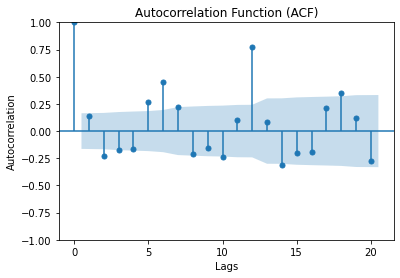

In [116]:
# Plotting the ACF
residuals = model.resid   # Get residuals

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [117]:
# Dummy variables for months
df['is_jan'] = (df.index.month == 1).astype(int)
df['is_jul'] = (df.index.month == 7).astype(int)
df['is_nov'] = (df.index.month == 11).astype(int)

# Assuming 'is_holiday' indicates specific months, adjust as necessary
df['is_holiday'] = df.index.month.isin([3, 6, 7, 8, 12]).astype(int)  # March, June, July, August, December as holiday months

print(df.head())

            time  value  sin_2pi_t_12  cos_2pi_t_12  log_passengers  \
1949-02-28     2    118  8.660254e-01  5.000000e-01        4.770685   
1949-03-31     3    132  1.000000e+00  6.123234e-17        4.882802   
1949-04-30     4    129  8.660254e-01 -5.000000e-01        4.859812   
1949-05-31     5    121  5.000000e-01 -8.660254e-01        4.795791   
1949-06-30     6    135  1.224647e-16 -1.000000e+00        4.905275   

            log_passengers_lag1  is_jan  is_jul  is_nov  is_holiday  
1949-02-28             4.718499       0       0       0           0  
1949-03-31             4.770685       0       0       0           1  
1949-04-30             4.882802       0       0       0           0  
1949-05-31             4.859812       0       0       0           0  
1949-06-30             4.795791       0       0       0           1  


In [118]:
# Define the model formula
formula = 'log_passengers ~ log_passengers_lag1 + time + sin_2pi_t_12 + cos_2pi_t_12 + is_holiday + is_jan + is_jul + is_nov'

# Fit the model
model = sm.OLS.from_formula(formula, data=df).fit()

# Display the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_passengers   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2394.
Date:                Mon, 20 May 2024   Prob (F-statistic):          1.37e-140
Time:                        21:00:09   Log-Likelihood:                 271.09
No. Observations:                 143   AIC:                            -524.2
Df Residuals:                     134   BIC:                            -497.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3428    

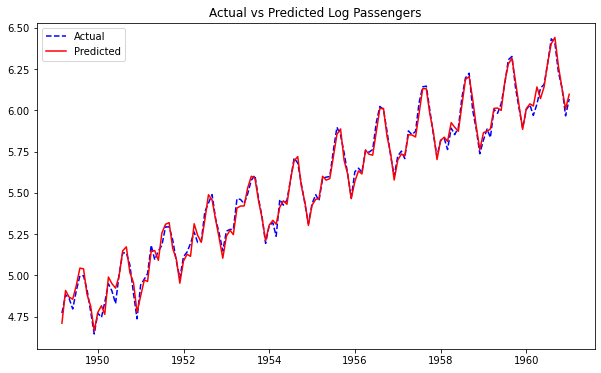

In [119]:
predictions = model.predict(df)   # Make predictions

# Plot actual vs predicted log passengers
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['log_passengers'], label='Actual', color='blue', linestyle='--')
plt.plot(df.index, predictions, label='Predicted', color = 'red')
plt.title('Actual vs Predicted Log Passengers')
plt.legend()
plt.show()

<Figure size 864x432 with 0 Axes>

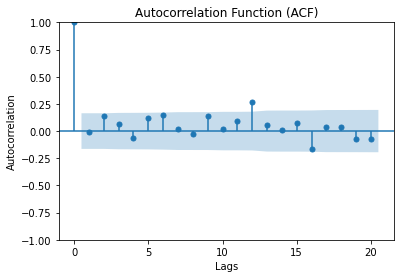

In [120]:
# Plotting the ACF
residuals = model.resid  # Get residuals

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [121]:
# Dummy variables for months
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for month in months:
    df[f'is_{month}'] = (df.index.month == months.index(month) + 1).astype(int)   # Add dummy variables for each month
    
print(df.head())

            time  value  sin_2pi_t_12  cos_2pi_t_12  log_passengers  \
1949-02-28     2    118  8.660254e-01  5.000000e-01        4.770685   
1949-03-31     3    132  1.000000e+00  6.123234e-17        4.882802   
1949-04-30     4    129  8.660254e-01 -5.000000e-01        4.859812   
1949-05-31     5    121  5.000000e-01 -8.660254e-01        4.795791   
1949-06-30     6    135  1.224647e-16 -1.000000e+00        4.905275   

            log_passengers_lag1  is_jan  is_jul  is_nov  is_holiday  is_feb  \
1949-02-28             4.718499       0       0       0           0       1   
1949-03-31             4.770685       0       0       0           1       0   
1949-04-30             4.882802       0       0       0           0       0   
1949-05-31             4.859812       0       0       0           0       0   
1949-06-30             4.795791       0       0       0           1       0   

            is_mar  is_apr  is_may  is_jun  is_aug  is_sep  is_oct  is_dec  
1949-02-28       0   

In [122]:
# Define the model formula
formula = 'log_passengers ~ log_passengers_lag1 + time + is_jan + is_feb + is_mar + is_apr + is_may + is_jun + is_jul + is_aug + is_sep + is_oct + is_nov + is_dec'

# Fit the model
model = sm.OLS.from_formula(formula, data=df).fit()

# Display the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_passengers   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1524.
Date:                Mon, 20 May 2024   Prob (F-statistic):          2.47e-134
Time:                        21:00:40   Log-Likelihood:                 276.21
No. Observations:                 143   AIC:                            -524.4
Df Residuals:                     129   BIC:                            -482.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9279    

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1524.
Date:                Mon, 20 May 2024   Prob (F-statistic):          2.47e-134
Time:                        21:00:43   Log-Likelihood:                 276.21
No. Observations:                 143   AIC:                            -524.4
Df Residuals:                     129   BIC:                            -482.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9279      0.243      3.813      0.000       0.446       1.409
log_passengers_lag1     0.7931      0.055     14.446      0.000       0.684       0.902
time                    0.0021      0.001      3.679      0.000       0.001       0.003
is_jan                  0.0723      0.018      3.967      0.000       0.036       0.108
is_feb                  0.0379      0.019      2.034      0.044       0.001       0.075
is_mar                  0.1856      0.018     10.541      0.000       0.151       0.220
is_apr                  0.0511      0.024      2.147      0.034       0.004       0.098
is_may                  0.0735      0.022      3.304      0.001       0.029       0.118
is_jun                  0.1976      0.022      8.924      0.000       0.154       0.241
is_jul                  0.2047      0.028      7.243      0.000       0.149       0.261
is_aug                  0.1130      0.034      3.358      0.001       0.046       0.180
is_sep                 -0.0243      0.033     -0.732      0.466      -0.090       0.041
is_oct                 -0.0477      0.026     -1.854      0.066      -0.099       0.003
is_nov                 -0.0818      0.019     -4.305      0.000      -0.119      -0.044
is_dec                  0.1461      0.013     11.175      0.000       0.120       0.172
==============================================================================
Omnibus:                        2.380   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.106
Skew:                          -0.296   Prob(JB):                        0.349
Kurtosis:                       3.055   Cond. No.                     1.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

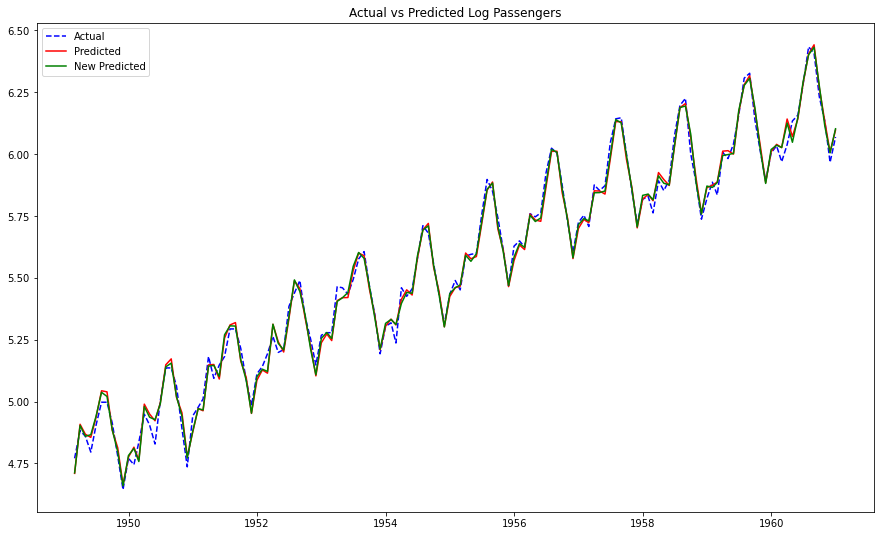

In [125]:
new_predictions = model.predict(df)  # Make predictions

# Plot actual vs predicted log passengers
plt.figure(figsize=(15, 9))
plt.plot(df.index, df['log_passengers'], label='Actual', color='blue', linestyle='--')  # Plot actual log passengers
plt.plot(df.index, predictions, label='Predicted', color = 'red')                       # Plot predicted log passengers
plt.plot(df.index, new_predictions, label='New Predicted', color = 'green')             # Plot new predicted log passengers using month dummies
plt.title('Actual vs Predicted Log Passengers')
plt.legend()
plt.show()

<Figure size 864x432 with 0 Axes>

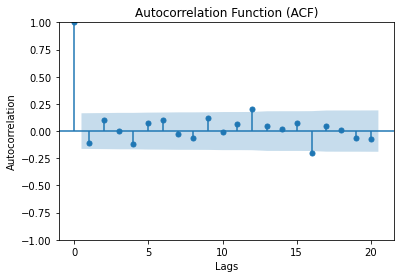

In [111]:
# Plotting the ACF
residuals = model.resid  # Get residuals

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()